<a href="https://colab.research.google.com/github/nidhinpaulbinu/CE880/blob/main/Assesment_DataSci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

0.000    1311
0.001     164
0.002     112
0.003      88
0.004      49
         ... 
0.079       1
0.109       1
0.103       1
0.031       1
0.099       1
Name: fetal_movement, Length: 102, dtype: int64

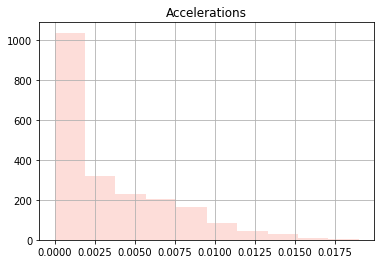

In [ ]:
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, Binarizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, auc
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import SelectPercentile
import xgboost


%matplotlib inline

df = pd.read_csv('fetal_health.csv')
# previewing the DataFrame
df.head()
df.info()
df.shape
df.describe()
df = df.rename(columns = {'baseline value':'baseline_value', 'prolongued_decelerations': 'prolonged_decelerations'})
df.columns
df.accelerations.value_counts()
sns.set_palette(palette='RdPu')
df.accelerations.hist()
plt.title('Accelerations');
df.fetal_movement.value_counts()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline_value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolonged_decelerations                                 2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.corr()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline_value,1.000,-0.081,-0.033,-0.146,-0.159,-0.054,-0.105,0.306,-0.280,0.286,...,0.362,0.275,-0.114,-0.005,0.709,0.723,0.789,-0.134,0.294,0.148
accelerations,-0.081,1.000,0.048,0.090,-0.109,-0.043,-0.128,-0.280,0.207,-0.374,...,-0.154,0.394,0.190,-0.006,0.244,0.270,0.273,0.126,0.028,-0.364
fetal_movement,-0.033,0.048,1.000,-0.069,0.049,-0.011,0.266,-0.104,0.121,-0.074,...,-0.154,0.100,0.165,-0.018,-0.061,-0.090,-0.072,0.179,-0.002,0.088
uterine_contractions,-0.146,0.090,-0.069,1.000,0.285,0.007,0.077,-0.233,0.290,-0.307,...,-0.113,0.123,0.083,0.058,-0.105,-0.188,-0.140,0.239,-0.072,-0.205
light_decelerations,-0.159,-0.109,0.049,0.285,1.000,0.108,0.226,-0.119,0.562,-0.271,...,-0.554,0.218,0.398,0.235,-0.347,-0.527,-0.389,0.564,0.000,0.059
severe_decelerations,-0.054,-0.043,-0.011,0.007,0.108,1.000,0.012,0.034,0.034,-0.031,...,-0.072,-0.021,0.007,0.043,-0.215,-0.159,-0.160,0.136,-0.070,0.132
prolonged_decelerations,-0.105,-0.128,0.266,0.077,0.226,0.012,1.000,0.046,0.267,-0.137,...,-0.277,0.120,0.223,0.056,-0.436,-0.489,-0.445,0.503,-0.215,0.485
abnormal_short_term_variability,0.306,-0.280,-0.104,-0.233,-0.119,0.034,0.046,1.000,-0.431,0.459,...,0.275,-0.112,-0.168,-0.149,0.058,0.075,0.120,-0.146,-0.006,0.471
mean_value_of_short_term_variability,-0.280,0.207,0.121,0.290,0.562,0.034,0.267,-0.431,1.000,-0.470,...,-0.623,0.409,0.501,0.266,-0.308,-0.445,-0.336,0.556,-0.066,-0.103
percentage_of_time_with_abnormal_long_term_variability,0.286,-0.374,-0.074,-0.307,-0.271,-0.031,-0.137,0.459,-0.470,1.000,...,0.423,-0.283,-0.279,-0.122,0.165,0.222,0.186,-0.282,0.042,0.426


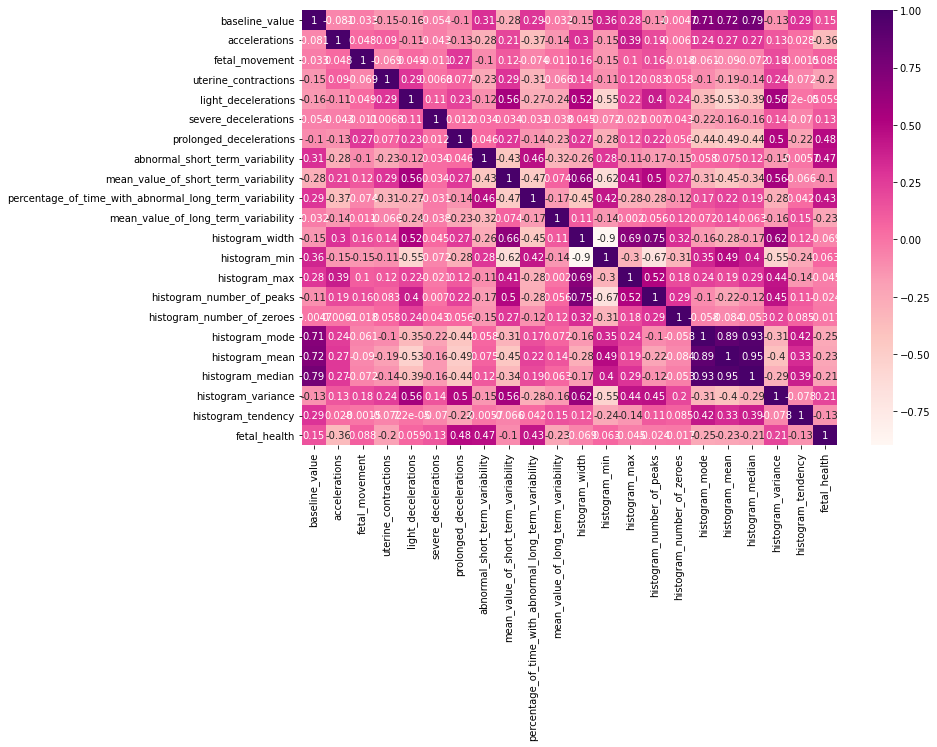

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="RdPu");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Prolonged Decelerations and Fetal Health Outcomes')

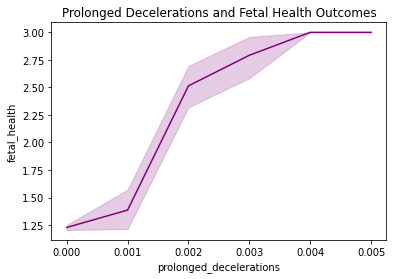

In [ ]:
sns.set_palette(palette='RdPu_r')
sns.lineplot('prolonged_decelerations','fetal_health', data=df, alpha=1.0)
plt.title('Prolonged Decelerations and Fetal Health Outcomes')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


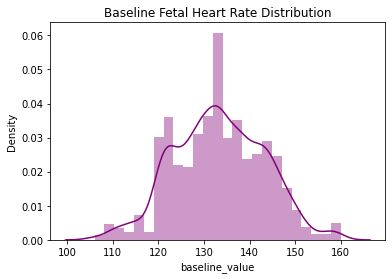

In [ ]:
sns.set_palette(palette='RdPu_r')
sns.distplot(df['baseline_value'])
plt.title('Baseline Fetal Heart Rate Distribution');

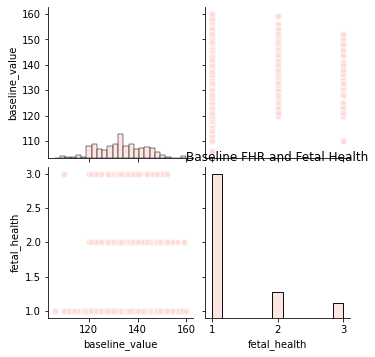

In [ ]:
sns.set_palette(palette='RdPu')
sns.pairplot(df[['baseline_value', 'fetal_health']])
plt.title('Baseline FHR and Fetal Health');

In [ ]:
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [ ]:
histogram_columns = ['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

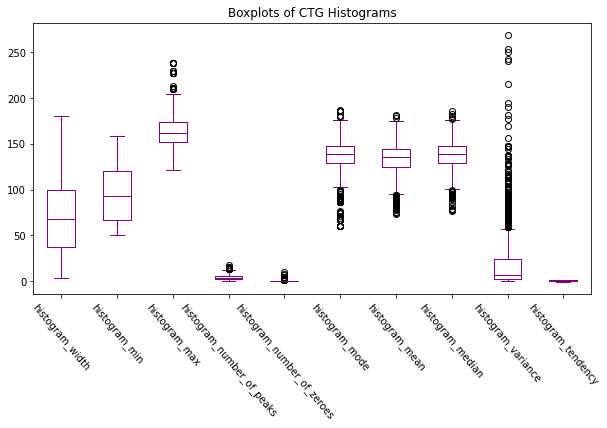

In [ ]:
df[histogram_columns].plot(kind='box',grid=False, color='Purple', figsize=(10,5));
plt.xticks(rotation=(-50))
plt.title('Boxplots of CTG Histograms');

In [ ]:
df.isnull().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolonged_decelerations                                   0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
df.fetal_health.value_counts()

1.000    1655
2.000     295
3.000     176
Name: fetal_health, dtype: int64

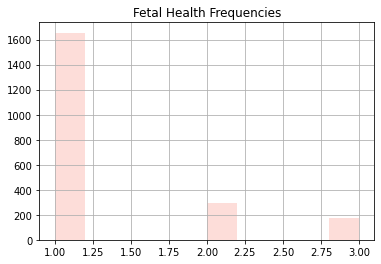

In [ ]:
df.fetal_health.hist()
plt.title('Fetal Health Frequencies');

In [ ]:
df.loc[df['fetal_health']==1.000, 'fh_outcome'] = 'Normal'
df.loc[df['fetal_health']==2.000, 'fh_outcome'] = 'At Risk'
df.loc[df['fetal_health']==3.000, 'fh_outcome'] = 'At Risk'

In [ ]:
df = df.drop(columns='fetal_health', axis=1)

In [ ]:
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,At Risk
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,Normal
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,Normal
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,Normal
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,Normal


In [ ]:
df.fh_outcome.value_counts()

Normal     1655
At Risk     471
Name: fh_outcome, dtype: int64

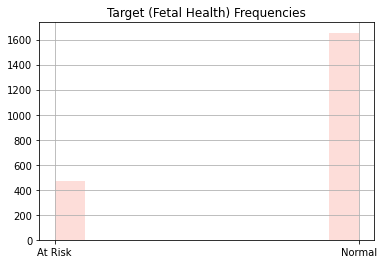

In [ ]:
df.fh_outcome.hist()
plt.title('Target (Fetal Health) Frequencies');

In [ ]:
df.dtypes

baseline_value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolonged_decelerations                                   float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [ ]:
df = pd.get_dummies(df, columns=['fh_outcome'])
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk,fh_outcome_Normal
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,1,0
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,0,1
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,0,1
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,0,1
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,0,1


In [ ]:
df.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fh_outcome_At Risk', 'fh_outcome_Normal'],
      dtype='object')

In [ ]:
df = df.drop(columns=['fh_outcome_Normal'], axis=1)
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_At Risk
0,120.000,0.000,0.000,0.000,0.000,0.000,0.000,73.000,0.500,43.000,...,62.000,126.000,2.000,0.000,120.000,137.000,121.000,73.000,1.000,1
1,132.000,0.006,0.000,0.006,0.003,0.000,0.000,17.000,2.100,0.000,...,68.000,198.000,6.000,1.000,141.000,136.000,140.000,12.000,0.000,0
2,133.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.100,0.000,...,68.000,198.000,5.000,1.000,141.000,135.000,138.000,13.000,0.000,0
3,134.000,0.003,0.000,0.008,0.003,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,11.000,0.000,137.000,134.000,137.000,13.000,1.000,0
4,132.000,0.007,0.000,0.008,0.000,0.000,0.000,16.000,2.400,0.000,...,53.000,170.000,9.000,0.000,137.000,136.000,138.000,11.000,1.000,0


In [ ]:
df['fh_outcome_At Risk'].value_counts()

0    1655
1     471
Name: fh_outcome_At Risk, dtype: int64

In [ ]:
df = df.rename(columns={'fh_outcome_At Risk':'target'})
df.target.value_counts()

0    1655
1     471
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


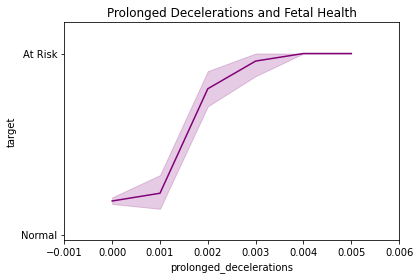

In [ ]:
sns.set_palette(palette='RdPu_r')
sns.lineplot('prolonged_decelerations','target', data=df, alpha=1.0)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


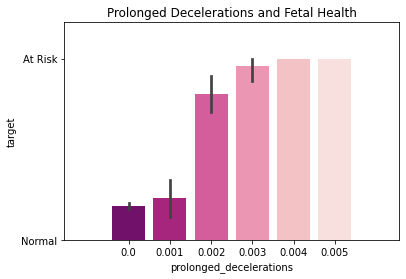

In [ ]:
sns.set_palette(palette='RdPu_r')
sns.barplot('prolonged_decelerations','target', data=df)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

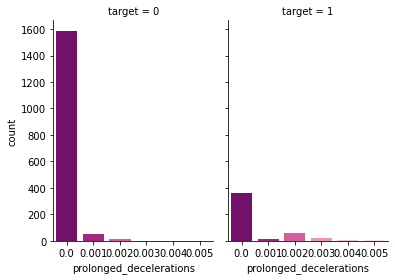

In [ ]:
g = sns.catplot(x="prolonged_decelerations", col="target",
                data=df, kind="count",
                height=4, aspect=0.7)

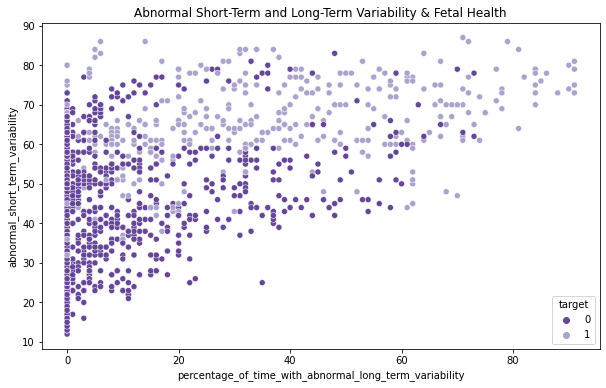

In [ ]:
sns.set_palette(palette='PuOr_r')
plt.figure(figsize=(10,6))
sns.scatterplot(x="percentage_of_time_with_abnormal_long_term_variability", y="abnormal_short_term_variability", hue='target', data=df)
plt.title('Abnormal Short-Term and Long-Term Variability & Fetal Health');

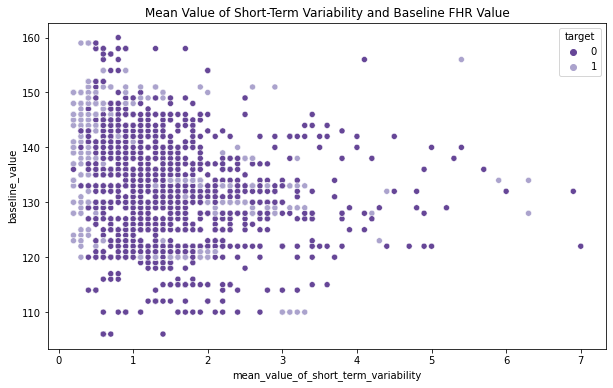

In [ ]:
sns.set_palette(palette='PuOr_r')
plt.figure(figsize=(10,6))
sns.scatterplot(x="mean_value_of_short_term_variability", y="baseline_value", hue='target', data=df)
plt.title('Mean Value of Short-Term Variability and Baseline FHR Value');

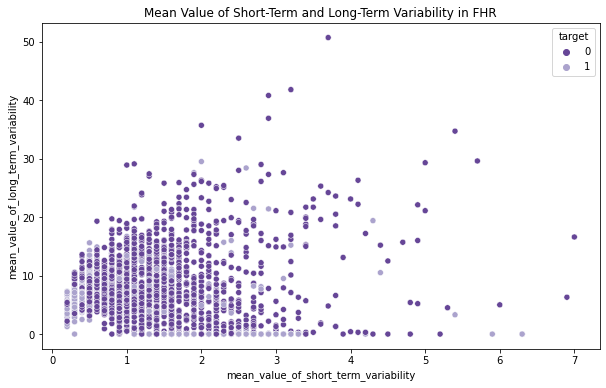

In [ ]:
sns.set_palette(palette='PuOr_r')
plt.figure(figsize=(10,6))
sns.scatterplot(x="mean_value_of_short_term_variability", y="mean_value_of_long_term_variability", hue='target', data=df)
plt.title('Mean Value of Short-Term and Long-Term Variability in FHR');

In [ ]:
y = df['target']
X = df.drop(columns='target')

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = tree_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))

[[484  13]
 [ 32 109]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       497
           1       0.89      0.77      0.83       141

    accuracy                           0.93       638
   macro avg       0.92      0.87      0.89       638
weighted avg       0.93      0.93      0.93       638

Recall score:  0.7730496453900709


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


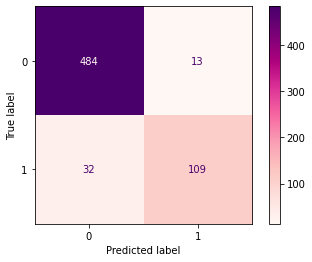

In [ ]:
plot_confusion_matrix(tree_clf, X_test, y_test,cmap="RdPu")
plt.show()

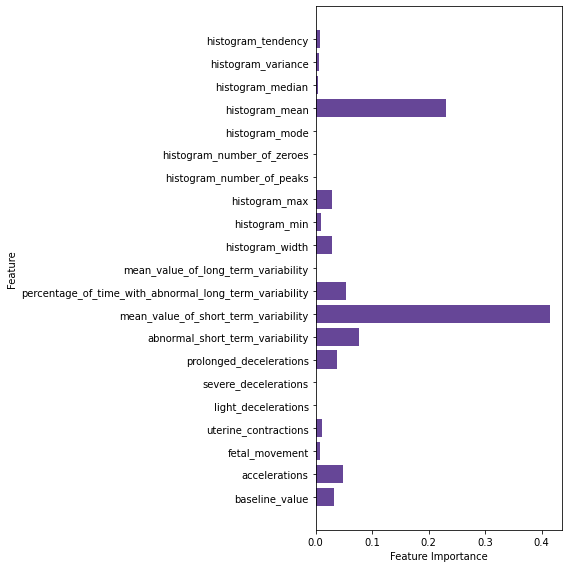

In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)
plt.tight_layout()

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight='balanced', random_state=42) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [ ]:
y_pred = tree_clf.predict(X_test)

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))

[[463  34]
 [ 23 118]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       497
           1       0.78      0.84      0.81       141

    accuracy                           0.91       638
   macro avg       0.86      0.88      0.87       638
weighted avg       0.91      0.91      0.91       638

Recall score:  0.8368794326241135


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


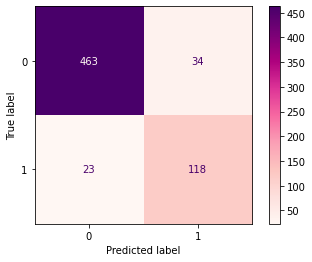

In [ ]:
plot_confusion_matrix(tree_clf, X_test, y_test,cmap="RdPu")
plt.show()

In [ ]:
def pipe_maker(classifier):
    '''Takes in a classifier, returns a pipeline'''
    pipe = Pipeline([('scl', StandardScaler()),
                    ('clf', classifier(class_weight= 'balanced', random_state=42))])
    return pipe

In [ ]:
def gridsearch_maker(pipeline, params):
    '''Takes in a pipeline and param grid, returns GridSearchCV object'''
    return GridSearchCV(estimator=pipeline,
                        param_grid=params,
                        scoring='recall',
                        cv=10,
                        n_jobs=-1)

In [ ]:
#param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range = [1, 2, 3, 4, 5]
param_range_small = [1.0, 0.5, 0.1]

In [ ]:
def find_best_recall(gridsearch):
    # fitting the grid search
    best_recall = 0.0
    gridsearch.fit(X_train, y_train)
    # best params
    print('Best params: %s' % gridsearch.best_params_)
    # best training data recall
    print('Best training recall: %.3f' % gridsearch.best_score_)
    # predict on test data with best params
    y_pred = gridsearch.predict(X_test)
    # test data recall with best params
    print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
    # confusion matrix and classification report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('Recall score: ',recall_score(y_test, y_pred))
    # plotting confusion matrix
    plot_confusion_matrix(gridsearch, X_test, y_test,cmap="RdPu")
    plt.show()

Best params: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training recall: 0.927
Test set recall score for best params: 0.922 
[[419  78]
 [ 11 130]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       497
           1       0.62      0.92      0.74       141

    accuracy                           0.86       638
   macro avg       0.80      0.88      0.82       638
weighted avg       0.90      0.86      0.87       638

Recall score:  0.9219858156028369


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


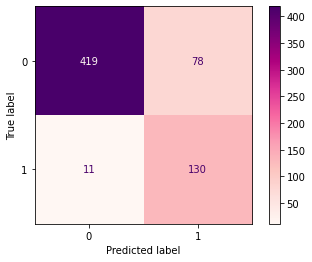

In [ ]:
pipe_lr = pipe_maker(LogisticRegression)

# setting grid search parameters
grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': param_range_small,
                   'clf__solver': ['liblinear']}]

# creating grid search object
gs_lr = gridsearch_maker(pipe_lr, grid_params_lr)

# finding best parameters for recall
find_best_recall(gs_lr)

Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 2}
Best training recall: 0.891
Test set recall score for best params: 0.950 
[[462  35]
 [  7 134]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       497
           1       0.79      0.95      0.86       141

    accuracy                           0.93       638
   macro avg       0.89      0.94      0.91       638
weighted avg       0.94      0.93      0.94       638

Recall score:  0.950354609929078


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


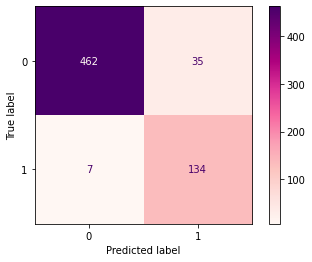

In [ ]:
pipe_rf = pipe_maker(RandomForestClassifier)
print(pipe_rf)
# setting grid search parameters
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]
                   }]

# creating grid search object
gs_rf = gridsearch_maker(pipe_rf, grid_params_rf)

# finding best parameters for recall
find_best_recall(gs_rf)

Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 2}
Best training recall: 0.909
Test set recall score for best params: 0.922 
[[435  62]
 [ 11 130]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.92       497
           1       0.68      0.92      0.78       141

    accuracy                           0.89       638
   macro avg       0.83      0.90      0.85       638
weighted avg       0.91      0.89      0.89       638

Recall score:  0.9219858156028369


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


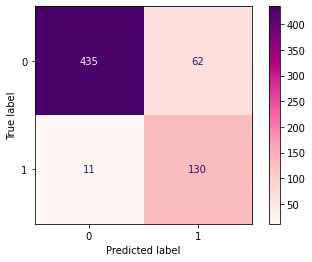

In [ ]:
pipe_et = pipe_maker(ExtraTreesClassifier)

# setting grid search parameters
grid_params_et = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

# creating grid search object
gs_et = gridsearch_maker(pipe_et, grid_params_et)

# finding best parameters for recall
find_best_recall(gs_et)

F1=0.863, AUC=0.946


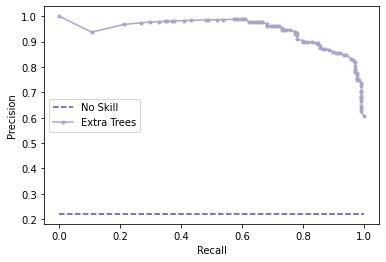

In [ ]:
pipe_et.fit(X_train, y_train)
#probabilities
probs = pipe_et.predict_proba(X_test)
# probabilities positive outcome only
probs = probs[:, 1]
# class values
y_pred = pipe_et.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, probs)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
print('F1=%.3f, AUC=%.3f' % (f1, auc))
#recision-recall curves
skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [skill, skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Extra Trees')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()